In [1]:
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import Normalizer
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
wine = pd.read_csv(r"C:\pyml_scripts\chapter06_svm\winequality-red.csv",sep=";")
wine_noquality = wine.drop("quality", axis=1)
wine_normal = Normalizer().fit_transform(wine_noquality)
X = wine_normal
y = wine['quality'].values
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2,stratify=y)

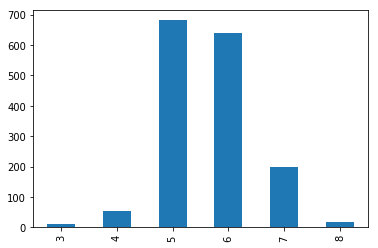

In [3]:
wine['quality'].value_counts().sort_index().plot(kind='bar')
plt.show()

In [4]:
clf_svm_l = svm.LinearSVC(C=10) #請試著調整C值,並看看對clf.score的影響

In [5]:
clf_svm_l

LinearSVC(C=10, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

In [6]:
clf_svm_l.fit(X_train,y_train)

LinearSVC(C=10, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

In [7]:
clf_svm_l.score(X_train,y_train)

0.5551211884284597

In [8]:
clf_svm_l.score(X_test,y_test)

0.525

In [9]:
lr = LogisticRegression(C=10)
lr.fit(X_train,y_train)
lr.score(X_test,y_test)

0.490625

In [10]:
clf_svm_l = svm.LinearSVC(C=1.)

In [11]:
clf_svm_l.fit(X_train,y_train)
clf_svm_l.score(X_test,y_test)

0.490625

In [12]:
lr = LogisticRegression(C=1.)
lr.fit(X_train,y_train)
lr.score(X_test,y_test)

0.475

In [13]:
clf_svm_l = svm.LinearSVC(C=100.)

In [14]:
clf_svm_l.fit(X_train,y_train)
clf_svm_l.score(X_test,y_test)

0.54375

In [15]:
lr = LogisticRegression(C=100.)
lr.fit(X_train,y_train)
lr.score(X_test,y_test)

0.53125

In [16]:
clf_svm_l = svm.LinearSVC(C=0.1)
clf_svm_l.fit(X_train,y_train)
clf_svm_l.score(X_test,y_test)

0.478125

In [17]:
clf_rbf = svm.SVC()

In [18]:
clf_rbf

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [19]:
clf_rbf.fit(X_train,y_train)
y_pred = clf_rbf.predict(X_test)

In [20]:
y_pred

array([6, 6, 6, 6, 5, 6, 5, 6, 6, 6, 5, 6, 6, 6, 6, 5, 6, 6, 6, 6, 5, 5,
       5, 6, 6, 5, 6, 6, 6, 6, 6, 5, 6, 5, 5, 5, 6, 6, 5, 5, 6, 6, 6, 5,
       6, 5, 5, 5, 5, 5, 5, 6, 6, 5, 6, 5, 6, 5, 5, 6, 5, 6, 6, 5, 6, 6,
       6, 6, 6, 6, 6, 5, 5, 5, 5, 6, 5, 5, 5, 5, 5, 5, 6, 6, 6, 5, 5, 6,
       6, 5, 6, 6, 6, 6, 6, 5, 6, 5, 6, 5, 6, 5, 6, 5, 6, 5, 5, 5, 5, 6,
       6, 5, 6, 5, 6, 5, 6, 5, 5, 5, 6, 5, 6, 6, 5, 6, 6, 6, 5, 6, 5, 6,
       6, 5, 6, 6, 5, 6, 5, 6, 6, 5, 6, 5, 5, 6, 5, 6, 6, 6, 6, 5, 6, 5,
       5, 6, 6, 6, 5, 6, 6, 6, 6, 6, 6, 5, 5, 6, 5, 6, 6, 6, 5, 6, 6, 5,
       5, 5, 6, 5, 5, 6, 5, 5, 5, 5, 6, 6, 5, 5, 5, 6, 6, 5, 6, 6, 5, 6,
       6, 6, 5, 5, 6, 5, 5, 6, 6, 5, 6, 6, 6, 5, 5, 6, 6, 5, 5, 6, 6, 6,
       5, 6, 5, 5, 5, 5, 6, 5, 6, 6, 5, 5, 5, 6, 5, 5, 5, 6, 6, 6, 6, 6,
       5, 5, 6, 6, 5, 5, 5, 5, 5, 5, 6, 5, 6, 5, 5, 6, 5, 6, 5, 6, 6, 6,
       5, 5, 5, 5, 6, 6, 5, 5, 5, 5, 6, 5, 6, 6, 5, 5, 6, 5, 5, 5, 6, 5,
       5, 6, 6, 6, 5, 6, 6, 6, 5, 5, 6, 5, 5, 6, 6,

In [21]:
from sklearn.metrics import mean_squared_error, r2_score

In [22]:
#r2是回歸所使用測量指標,分類常用的accurancy,precision,recall,f1,AUC
print(r2_score(y_test, y_pred))

-0.13324051092681155


In [23]:
print(mean_squared_error(y_test, y_pred))

0.73125


In [24]:
clf_rbf.score(X_test,y_test)

0.475

In [25]:
#Kernel coefficient for ‘rbf’, ‘poly’ and ‘sigmoid’
#if gamma='scale' (default) is passed then it uses 1 / (n_features * X.var()) as value of gamma
#if ‘auto’, uses 1 / n_features.
clf = svm.SVC(gamma=0.001,C=0.1)
clf.fit(X_train,y_train)
clf.score(X_test,y_test)

0.425

In [26]:
clf = svm.SVC(gamma=0.001,C=100.)
clf.fit(X_train,y_train)
clf.score(X_test,y_test)

0.478125

In [27]:
clf = svm.SVC(gamma=0.01,C=5.)
clf.fit(X_train,y_train)
clf.score(X_test,y_test)

0.44375

In [28]:
clf = svm.SVC(gamma=0.01,C=0.5)
clf.fit(X_train,y_train)
clf.score(X_test,y_test)

0.425

In [29]:
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [30]:
from sklearn.decomposition import PCA
pca = PCA(2)
pca.fit_transform(X_train,y_train)

from sklearn.pipeline import Pipeline
clfp = Pipeline([
        ('dim', PCA(2)),
        ('svm', svm.SVC())])
clfp.fit(X_train, y_train)
clfp.score(X_test, y_test)

0.478125

In [31]:
#先對特徵進行Normalization
wine2 = pd.read_csv(r'C:\pyml_scripts\chapter06_svm\winequality-red.csv', header=0, sep=';')
X = wine2[list(wine2.columns)[:-1]]
y = wine2['quality']
wine_normal = Normalizer().fit_transform(wine_noquality)
X = wine_normal
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=123,test_size=0.2)

In [32]:
clf_lin = svm.LinearSVC()
clf_lin.fit(X_train,y_train)
clf_lin.score(X_test,y_test)

0.521875

In [33]:
clf = svm.SVC()  #kernel='rbf'
clf.fit(X_train,y_train)
clf.score(X_test,y_test)

0.5

In [34]:
clf = svm.SVC(gamma=1,C=1.0)  #kernel='rbf'
clf.fit(X_train,y_train)
clf.score(X_test,y_test)

0.53125

In [35]:
clf = svm.SVC(gamma=100,C=100.0)  #kernel='rbf'
clf.fit(X_train,y_train)
clf.score(X_test,y_test)

0.571875

In [36]:
clf = svm.SVC(kernel='linear')
clf.fit(X_train,y_train)
clf.score(X_test,y_test)

0.525

In [37]:
clf = svm.SVC(kernel='poly')
clf.fit(X_train,y_train)
clf.score(X_test,y_test)

0.409375

In [38]:
#先對特徵進行Standardization
from sklearn.preprocessing import StandardScaler
wine3 = pd.read_csv(r'C:\pyml_scripts\chapter06_svm\winequality-red.csv', header=0, sep=';')
X = wine3[list(wine2.columns)[:-1]]
y = wine3['quality']
wine_std = StandardScaler().fit_transform(wine_noquality)
X = wine_std
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=999,test_size=0.2)
clf = svm.SVC(gamma=1,C=1.0)  #kernel='rbf'
clf.fit(X_train,y_train)
clf.score(X_test,y_test)

0.671875

In [39]:
clf.predict(X_test)

array([5, 6, 7, 6, 6, 5, 5, 5, 6, 5, 5, 5, 6, 6, 6, 6, 6, 5, 5, 6, 5, 5,
       5, 6, 5, 7, 6, 5, 5, 6, 6, 6, 5, 6, 5, 5, 6, 6, 6, 6, 5, 5, 5, 6,
       5, 5, 6, 6, 6, 6, 6, 7, 6, 6, 6, 6, 6, 5, 6, 6, 6, 6, 6, 5, 5, 5,
       5, 6, 6, 6, 6, 5, 6, 6, 5, 6, 6, 5, 5, 6, 5, 7, 6, 6, 6, 6, 5, 6,
       6, 5, 6, 6, 6, 6, 5, 5, 5, 5, 5, 6, 6, 5, 6, 6, 7, 5, 5, 6, 6, 6,
       5, 5, 5, 6, 6, 5, 5, 5, 6, 6, 6, 5, 6, 6, 6, 5, 5, 6, 5, 5, 5, 5,
       6, 6, 5, 6, 5, 7, 6, 6, 5, 5, 6, 5, 6, 6, 5, 7, 6, 5, 5, 5, 5, 6,
       5, 6, 6, 5, 6, 6, 6, 6, 6, 6, 6, 6, 5, 5, 5, 6, 5, 6, 6, 7, 6, 5,
       5, 6, 6, 5, 6, 5, 5, 5, 5, 5, 5, 7, 6, 5, 7, 5, 6, 6, 7, 7, 5, 5,
       5, 5, 5, 5, 6, 5, 6, 5, 5, 6, 6, 6, 5, 5, 6, 5, 6, 6, 5, 7, 6, 6,
       6, 6, 7, 6, 5, 5, 6, 6, 6, 5, 5, 5, 6, 5, 6, 6, 5, 5, 6, 6, 6, 7,
       6, 6, 6, 5, 6, 6, 5, 5, 6, 6, 5, 6, 5, 5, 5, 6, 6, 5, 5, 5, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 5, 6, 5, 5, 5, 6, 5, 6, 6, 5, 6, 5, 6, 7,
       6, 6, 5, 6, 6, 5, 7, 5, 5, 6, 5, 5, 5, 6, 5,

In [40]:
y_test.ravel()

array([5, 5, 7, 7, 5, 5, 7, 5, 6, 5, 4, 5, 5, 6, 7, 7, 6, 4, 5, 6, 5, 5,
       5, 6, 5, 6, 5, 5, 6, 5, 5, 6, 6, 6, 5, 5, 5, 6, 5, 6, 6, 5, 5, 6,
       5, 5, 6, 6, 6, 6, 6, 7, 6, 6, 6, 6, 6, 5, 6, 6, 6, 6, 6, 5, 5, 5,
       5, 7, 5, 6, 5, 5, 7, 6, 5, 7, 6, 5, 6, 7, 5, 7, 6, 6, 6, 7, 5, 6,
       6, 6, 6, 7, 5, 6, 5, 5, 4, 5, 6, 6, 6, 5, 6, 6, 7, 5, 6, 6, 5, 7,
       5, 5, 5, 6, 6, 5, 5, 5, 6, 8, 6, 5, 6, 6, 6, 5, 5, 5, 5, 5, 5, 5,
       6, 5, 5, 6, 6, 6, 6, 4, 5, 5, 6, 5, 5, 7, 5, 7, 6, 5, 5, 6, 3, 7,
       5, 6, 3, 5, 5, 6, 6, 4, 7, 5, 4, 6, 4, 5, 6, 6, 5, 5, 6, 7, 5, 5,
       4, 5, 6, 5, 6, 5, 5, 5, 5, 5, 6, 7, 6, 5, 7, 6, 6, 6, 6, 7, 5, 5,
       4, 5, 6, 6, 6, 6, 6, 6, 5, 7, 7, 6, 5, 5, 5, 6, 6, 6, 5, 7, 6, 5,
       5, 5, 7, 6, 6, 5, 5, 6, 6, 5, 5, 5, 7, 6, 6, 6, 5, 5, 5, 6, 6, 8,
       5, 7, 6, 5, 6, 6, 5, 5, 5, 6, 5, 5, 5, 4, 5, 6, 6, 6, 5, 5, 5, 6,
       5, 6, 6, 6, 5, 5, 6, 6, 5, 4, 5, 7, 7, 5, 5, 7, 6, 6, 6, 5, 5, 7,
       5, 6, 6, 7, 6, 5, 7, 5, 6, 6, 5, 5, 5, 6, 4,

In [41]:
clf = svm.LinearSVC()
clf.fit(X_train,y_train)
clf.score(X_test,y_test)

0.6125

In [42]:
clf = svm.SVC(gamma=0.9,C=1)  #kernel='rbf'
clf.fit(X_train,y_train)
clf.score(X_test,y_test)

0.675

In [43]:
clf = svm.SVC(kernel='poly')
clf.fit(X_train,y_train)
clf.score(X_test,y_test)

0.634375

In [44]:
clf = svm.SVC(kernel='sigmoid')
clf.fit(X_train,y_train)
clf.score(X_test,y_test)

0.503125